In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
pwd

'/home/walt/ml/models/covidxray'

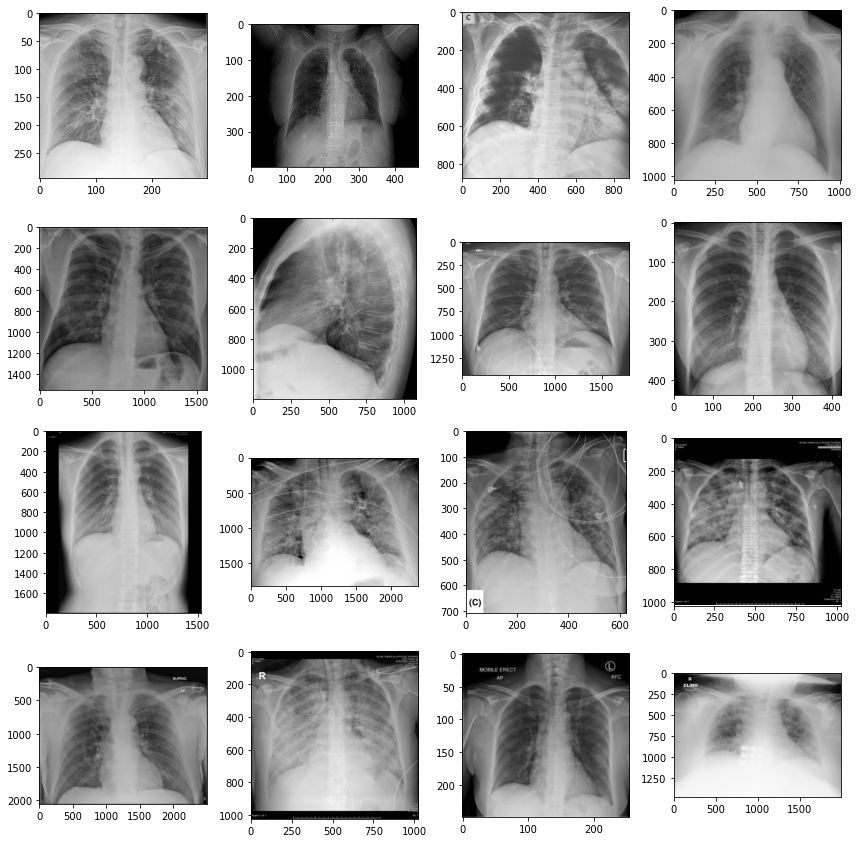

In [3]:
def show_images(n=4):
    covid_root = '/home/walt/ml/models/covidxray/xrays/'
    files_to_show = [os.path.join(covid_root,file) for file in os.listdir(covid_root)[:n]]
    plt.figure(figsize=(12,12))
    for i, img in enumerate(files_to_show):
        plt.subplot(math.sqrt(n),math.sqrt(n),i+1)
        img = cv2.imread(img,0)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.tight_layout()
    
show_images(16)

In [4]:
data = []
def create_data():
    covid_path = "/home/walt/ml/models/covidxray/xrays"
    covid_filenames = os.listdir(covid_path)
    normal_path = "/home/walt/ml/models/covidxray/chest_xray/chest_xray/train/NORMAL"
    normal_filenames = os.listdir(normal_path)
    i=0
    
    for imagePath in covid_filenames:
        image = os.path.join(covid_path, imagePath)
        image = cv2.imread(image,1)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224,224)) 
        data.append((image, 1))
    
    for path in normal_filenames:
        if i<len(covid_filenames):
            image = os.path.join(normal_path,path)
            image = cv2.imread(image,1)
            try:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (224,224))
                data.append((image, 0))
            except:
                continue
            i+=1

create_data()

In [5]:
X,y = [], []
np.random.shuffle(data)
for pic,label in data:
    X.append(pic/255.)
    y.append(label)

X = np.asarray(X).reshape(-1,224,224,3)
y = np.asarray(y)

In [6]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=(50/230.), random_state=42, shuffle=True) 
print(X_train.shape, X_test.shape)

(181, 224, 224, 3) (51, 224, 224, 3)


In [7]:
labels = pd.read_csv("metadata.csv")
labels.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,needed_supplemental_O2,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 27
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,infiltrate in the upper lobe of the left lung,NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [8]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()

for i in range(3):
    model.add(Conv2D(32, (3,3), input_shape=(224,224,3), activation="relu"))

model.add(MaxPool2D(2,2))
model.add(Conv2D(32, (3,3),activation="relu"))
model.add(Conv2D(32, (3,3),activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])  
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 218, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 107, 107, 32)      9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 105, 105, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 52, 52, 32)        0

In [9]:
H = model.fit(X_train,y_train,epochs=15,validation_split=.2)

Train on 144 samples, validate on 37 samples
Epoch 1/15
144/144 [==============================] - 3s 23ms/sample - loss: 1.5680 - acc: 0.4306 - val_loss: 0.6307 - val_acc: 0.7027
Epoch 2/15
144/144 [==============================] - 1s 5ms/sample - loss: 0.6591 - acc: 0.5208 - val_loss: 0.6799 - val_acc: 0.4595
Epoch 3/15
144/144 [==============================] - 1s 5ms/sample - loss: 0.6077 - acc: 0.7708 - val_loss: 0.4646 - val_acc: 0.9459
Epoch 4/15
144/144 [==============================] - 1s 5ms/sample - loss: 0.3865 - acc: 0.9514 - val_loss: 0.2207 - val_acc: 0.9189
Epoch 5/15
144/144 [==============================] - 1s 4ms/sample - loss: 0.1513 - acc: 0.9653 - val_loss: 0.1793 - val_acc: 0.9459
Epoch 6/15
144/144 [==============================] - 1s 4ms/sample - loss: 0.1402 - acc: 0.9514 - val_loss: 0.1771 - val_acc: 0.9189
Epoch 7/15
144/144 [==============================] - 1s 4ms/sample - loss: 0.1011 - acc: 0.9722 - val_loss: 0.4077 - val_acc: 0.9459
Epoch 8/15
144/1

In [10]:
model.evaluate(X_test,y_test)

51/51 [==============================] - 0s 6ms/sample - loss: 0.2453 - acc: 0.9412


[0.24532365798950195, 0.9411765]

In [11]:
print(classification_report(model.predict_classes(X_test),y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        26
           1       0.89      1.00      0.94        25

    accuracy                           0.94        51
   macro avg       0.95      0.94      0.94        51
weighted avg       0.95      0.94      0.94        51



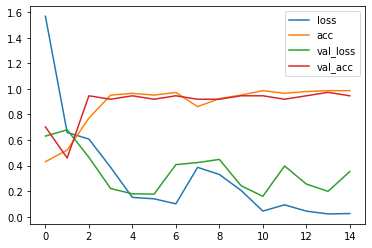

In [12]:
pd.DataFrame(H.history).plot()

# Using vgg16 as base

In [13]:
from tensorflow.keras.applications.vgg16 import VGG16 
base = VGG16(include_top=False,weights="imagenet",input_shape=(224,224,3), pooling="max")

In [14]:
base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
vgg = Sequential()
vgg.add(base)

vgg.add(Dropout(.2))
vgg.add(Dense(256, activation="relu"))
vgg.add(Dense(1, activation="sigmoid"))

vgg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 14,846,273
Trainable params: 14,846,273
Non-trainable params: 0
_________________________________________________________________


In [16]:
base.trainable=False

In [17]:
vgg.compile("adam", "binary_crossentropy", ["acc"])

In [18]:
H = vgg.fit(X_train,y_train,epochs=15,verbose=1,validation_split=0.2)

Train on 144 samples, validate on 37 samples
Epoch 1/15
144/144 [==============================] - 4s 26ms/sample - loss: 0.7422 - acc: 0.5486 - val_loss: 0.4849 - val_acc: 0.7027
Epoch 2/15
144/144 [==============================] - 1s 6ms/sample - loss: 0.4824 - acc: 0.7708 - val_loss: 0.4476 - val_acc: 0.8108
Epoch 3/15
144/144 [==============================] - 1s 6ms/sample - loss: 0.3376 - acc: 0.8681 - val_loss: 0.2624 - val_acc: 0.9459
Epoch 4/15
144/144 [==============================] - 1s 6ms/sample - loss: 0.2053 - acc: 0.9792 - val_loss: 0.2190 - val_acc: 0.9730
Epoch 5/15
144/144 [==============================] - 1s 6ms/sample - loss: 0.1776 - acc: 0.9583 - val_loss: 0.2386 - val_acc: 0.8919
Epoch 6/15
144/144 [==============================] - 1s 6ms/sample - loss: 0.1211 - acc: 0.9792 - val_loss: 0.1890 - val_acc: 0.9459
Epoch 7/15
144/144 [==============================] - 1s 6ms/sample - loss: 0.1089 - acc: 0.9792 - val_loss: 0.2160 - val_acc: 0.9459
Epoch 8/15
144/1

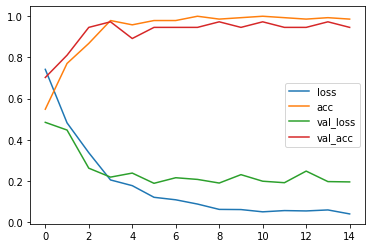

In [19]:
pd.DataFrame(H.history).plot()

In [20]:
print(classification_report(vgg.predict_classes(X_train),y_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        93
           1       0.99      0.99      0.99        88

    accuracy                           0.99       181
   macro avg       0.99      0.99      0.99       181
weighted avg       0.99      0.99      0.99       181



In [21]:
vgg.evaluate(X_train,y_train)

181/181 [==============================] - 1s 5ms/sample - loss: 0.0585 - acc: 0.9890


[0.05845647111782053, 0.98895025]

In [22]:
print(classification_report(vgg.predict_classes(X_test),y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.97      0.98        29

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



In [23]:
vgg.evaluate(X_test,y_test)

51/51 [==============================] - 0s 5ms/sample - loss: 0.0544 - acc: 0.9804


[0.05439874916976573, 0.98039216]

## Data Augmentation

In [24]:
training_gen = ImageDataGenerator(rotation_range=10, shear_range=0.2,
                            rescale=1/255.,width_shift_range=.1,
                            height_shift_range=.1,fill_mode="nearest",
                            zoom_range=.1)
testing_gen = ImageDataGenerator(rescale=1/255.)

In [26]:
train = '/home/walt/ml/models/covidxray/chest_xray/chest_xray/train/'
test = '/home/walt/ml/models/covidxray/chest_xray/chest_xray/test/'
valid = '/home/walt/ml/models/covidxray/chest_xray/chest_xray/val/'
train_gen = training_gen.flow_from_directory(train,batch_size=64,
                                        class_mode="categorical",target_size=(224,224))
valid_gen = training_gen.flow_from_directory(valid, batch_size=2, class_mode="categorical",target_size=(224,224))
test_gen = testing_gen.flow_from_directory(test, target_size=(224,224),
                                          class_mode="categorical")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# TO DO
# TRAIN MODEL ON AUGMENTED DATA
# TRY OUT GAN FOR CREATING NEW IMAGE DATA